### Задача 10.1.8

Промоделировать стационарные процессы теплопроводности
стержня в зависимости от входных данных задачи

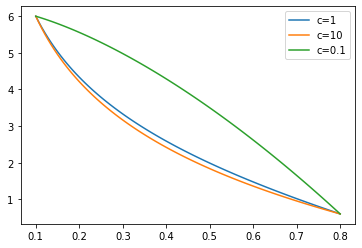

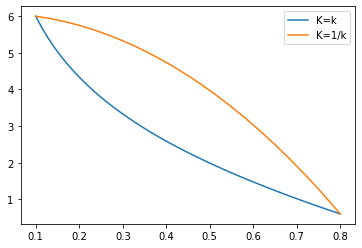

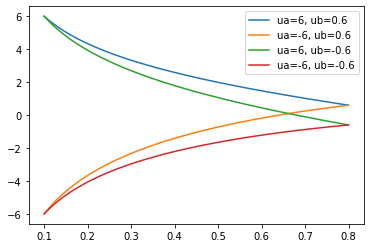

In [14]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

def solve(k, f, a, b, UA, UB):
    x = sym.symbols("x")
    u = sym.Function("u")
    eq = -(k * u(x).diff(x)).diff(x) - f
    return sym.dsolve(eq, ics={u(a):UA, u(b):UB})

x = sym.symbols("x")
k = x
f = x + x**(1/3)
a = 0.1
UA = 6
b = 0.8
UB = 0.6

x_vals = np.linspace(a, b, 100)
for c in [1, 10, 0.1]:
    u: sym.Equality = solve(c*k, f, a, b, UA, UB) 
    y_vals = [u.rhs.subs(x, x_value) for x_value in x_vals] 
    plt.plot(x_vals, y_vals, label=f"c={c}")
plt.legend()
plt.show()

for k_, label in [(k, 'k'), (1/k, '1/k')]:
    u: sym.Equality = solve(k_, f, a, b, UA, UB)
    y_vals = [u.rhs.subs(x, x_value) for x_value in x_vals]
    plt.plot(x_vals, y_vals, label=f"K={label}")
plt.legend()
plt.show()

for ua, ub in [(UA, UB), (-UA, UB), (UA, -UB), (-UA, -UB)]:
    u: sym.Equality = solve(k, f, a, b, ua, ub)
    y_vals = [u.rhs.subs(x, x_value) for x_value in x_vals]
    plt.plot(x_vals, y_vals, label=f"ua={ua}, ub={ub}")
plt.legend()
plt.show()

### Задача 10.3.4

Методом конечных разностей найти приближенное решение
указанной в индивидуальном варианте краевой задачи c точностью $\varepsilon$ и
построить его график. Решение системы разностных уравнений найти, используя
метод прогонки.

$$u''(x)+u'p(x)+q(x)u=f(x)$$


Разностная схема
$$\frac{u_{n+1} - 2u_{n} + u_{n-1}}{h^2} + p(x_n)\frac{u_{n+1} - u_{n-1}}{2h} + q(x_n)u_n = f(x_n)$$
$$u_{n+1}(1+ \frac{h}{2}p(x_n)) + (h^2q(x_n)-2)u_n + u_{n-1}(1 - \frac{h}{2}p(x_n)) =f(x_n)h^2

Задание
$$u''(x)-x u'+2 x u=2.8$$
$$u'(1.2) - 0.2u(1.2)=0.2$$
$$u'(2.2)=4$$
$$p(x)=-x, q(x)=2 x,f(x)=2.8$$

Левая граница
$$u_0' - 0.2 u_0=0.2$$
$$\frac{-u_2 + 4u_1 - 3u_0}{2h} - 0.2 u_0=0.2$$ 
$$-u_2 + 4u_1 - (0.4h + 3)u_0 = 0.4h$$

Правая граница
$$u_n'=4$$
$$3u_n - 4u_{n-1}+u_{n-2}=8h$$

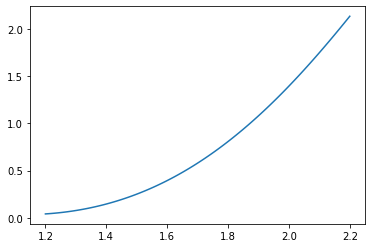

Error = 0.00005


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def p(x):
    return -x

def q(x):
    return 2*x

def f(x):
    return 2.8*np.ones_like(x)


def starting_1(l, m, u, r, dfx, fx, gx):
    coef = dfx/u[1]
    m[0] = -3*dfx + fx*2*h + l[1]*coef
    u[0] = 4*dfx + m[1]*coef
    r[0] = gx*2*h + r[1]*coef

def starting_2(l, m, u, r, dfx, fx, gx):
    coef = -dfx/l[-2]
    m[-1] = 3*dfx + fx* 2*h + u[-2]*coef
    l[-1] = -4*dfx + m[-2]*coef
    r[-1] = gx*2*h + r[-2]*coef


def tridiagonal_solver(l, m, u, r):
    n = m.size
    a = np.zeros(n)
    b = np.zeros(n)

    a[0] = -u[0] / m[0]
    b[0] = r[0] / m[0]

    for i in range(1, n-1):
       a[i]= -u[i] / (l[i] * a[i-1] + m[i])
       b[i]= (r[i] - l[i] * b[i-1]) / (l[i] * a[i-1] + m[i])

    X = np.zeros(n)
    b[n - 1]= (r[n - 1] - l[n - 1] * b[n - 2])/(m[n - 1] + l[n - 1] * a[n - 2])
    X[n - 1] = b[n - 1]

    for i in range(n - 2, -1, -1):
        X[i] = a[i]*X[i+1] + b[i]
    return X

    
eps = 0.07
n = 100
a = 1.2
b = 2.2
h = (b - a)/(n - 1)
x = np.linspace(a, b, n)
l = 1 - h/2*p(x)
m =  h*h*q(x) - 2
u = 1 + h/2*p(x)
r = f(x)*h*h
starting_1(l, m, u, r, 1, -0.2, 0.2)
starting_2(l, m, u, r, 1, 0, 4)

u_1 = tridiagonal_solver(l, m, u, r)
plt.plot(x, u_1)
plt.show()

n = 2*n - 1
h = (b - a)/(n - 1)
x = np.linspace(a, b, n)
l = 1 - h/2*p(x)
m =  h*h*q(x) - 2
u = 1 + h/2*p(x)
r = f(x)*h*h
starting_1(l, m, u, r, 1, -0.2, 0.2)
starting_2(l, m, u, r, 1, 0, 4)

u_2 = tridiagonal_solver(l, m, u, r)

print(f"Error = {np.max(np.abs((u_2[::2] - u_1) / 3)):.5f}")

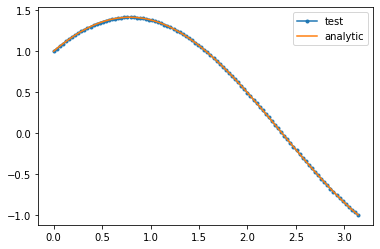

In [37]:
def p(x):
    return np.zeros_like(x)
def q(x):
    return np.ones_like(x)
def f(x):
    return np.zeros_like(x)

eps = 0.07
n = 100
a = 0
b = np.pi
h = (b - a)/(n - 1)
x = np.linspace(a, b, n)
l = 1 - h/2*p(x)
m =  h*h*q(x) - 2
u = 1 + h/2*p(x)
r = f(x)*h*h
starting_1(l, m, u, r, 0, 1, 1)
starting_2(l, m, u, r, 1, 0, -1)
y = tridiagonal_solver(l, m, u, r)
plt.plot(x,y, label="test", marker='.')
plt.plot(x, np.sin(x)+np.cos(x), label="analytic")
plt.legend()
plt.show()

### Задача 10.4.8

Промоделировать стационарные процессы теплопроводности
стержня в зависимости от входных данных задачи – переменного коэффициента
теплопроводности $k(x)$ и плотности источников тепла $f(x)$

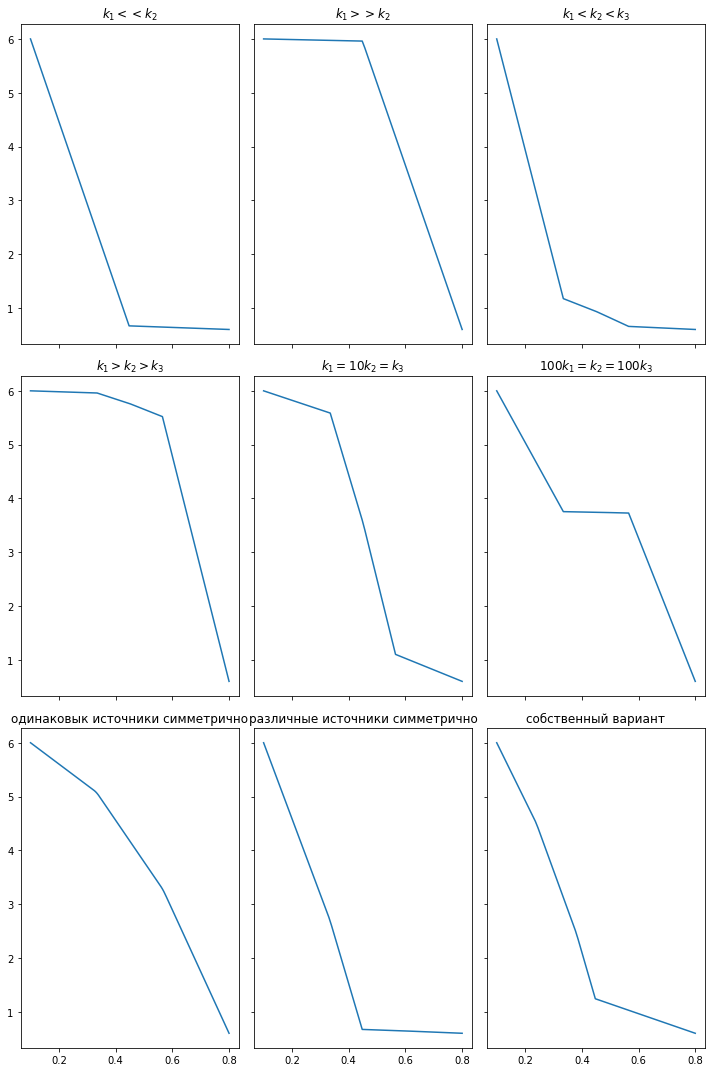

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def delta_f(x0, c):
    return lambda x: np.where(np.abs(x - x0) <= 0.01, c, 0) 

def k2(k_1, k_2):
    return lambda x: np.where(x <= 0.5*(a + b), k_1, k_2)

def k3(k_1, k_2, k_3):
    return lambda x: np.where(x <= (a + (b - a)/3), k_1, np.where(x > (a + 2*(b - a)/3), k_3, k_2))

def tridiagonal_solver(l, m, u, r):
    n = m.size
    a = np.zeros(n)
    b = np.zeros(n)

    a[0] = -u[0] / m[0]
    b[0] = r[0] / m[0]

    for i in range(1, n-1):
       a[i]=-u[i] / (l[i] * a[i-1] + m[i])
       b[i]=(r[i] - l[i] * b[i-1]) / (l[i] * a[i-1] + m[i])

    X = np.zeros(n)
    b[n - 1]= (r[n - 1] - l[n - 1] * b[n - 2])/(m[n - 1] + l[n - 1] * a[n - 2])
    X[n - 1] = b[n - 1]

    for i in range(n - 2, -1, -1):
        X[i] = a[i]*X[i+1] + b[i]
    return X

n = 150
a = 0.1
UA = 6
b = 0.8
UB = 0.6
h = (b - a) / (n - 1)

_k1 = 0.1
_10k1 = 1
_100k1 = 10
c1 = 20
c2 = 300
c3 = 70

graphs = [
    ('$k_1 << k_2$', k2(_k1, _100k1), delta_f(0.5*(a + b), c1)),
    ('$k_1 >> k_2$', k2(_100k1, _k1), delta_f(0.5*(a + b), c1)),
    ('$k_1 < k_2 < k_3$', k3(_k1, _10k1, _100k1), delta_f(0.5*(a + b), c1)),
    ('$k_1 > k_2 > k_3$', k3(_100k1, _10k1, _k1), delta_f(0.5*(a + b), c1)),
    ('$k_1 = 10k_2 = k_3$', k3(_10k1, _k1, _10k1), delta_f(0.5*(a + b), c1)),
    ('$100k_1 = k_2 = 100k_3$', k3(_k1, _100k1, _k1), delta_f(0.5*(a + b), c1)),
    ('одинаковык источники симметрично', k2(_k1, _k1),
        lambda x: delta_f(a + (b - a)/3, c1)(x) + delta_f(a + 2*(b - a)/3, c1)(x)),
    ('различные источники симметрично', k2(_k1, _100k1),
        lambda x: delta_f(a + (b - a)/3, c1)(x) + delta_f(a + 2*(b - a)/3, c1)(x)),
    ('собственный вариант', k2(_k1, _10k1),
        lambda x: delta_f(a + (b - a)/5, c1)(x) + delta_f(a + 2*(b - a)/5, c1)(x)),
]

fig, ax = plt.subplots(figsize=(10, 15), nrows=3, ncols=3, sharex=True, sharey=True)
for j, graph in enumerate(graphs):
    name, k, f = graph
    l = np.zeros(n, dtype=np.float64)
    m = np.zeros(n, dtype=np.float64)
    u = np.zeros(n, dtype=np.float64)
    r = np.zeros(n, dtype=np.float64)
    x = np.linspace(a, b, n)
    
    k_right = k((x[1: -1] + x[2:]) / 2)
    k_left = k((x[1: -1] + x[0:-2]) / 2)
    m[1:-1] = k_right + k_left
    l[1:-1] = -k_left
    u[1:-1] = -k_right
    r[1:-1] = f(x[1:-1])*h*h
    
    m[0] = 1
    m[-1] = 1
    r[0] = UA
    r[-1] = UB
    u = tridiagonal_solver(l, m, u, r)
    ax[j // 3][j % 3].plot(x, u, label=name)
    ax[j // 3][j % 3].set_title(name)

plt.tight_layout()
plt.show()

### Задача 10.5.8

Методом конечных разностей найти приближенное решение
краевой задачи

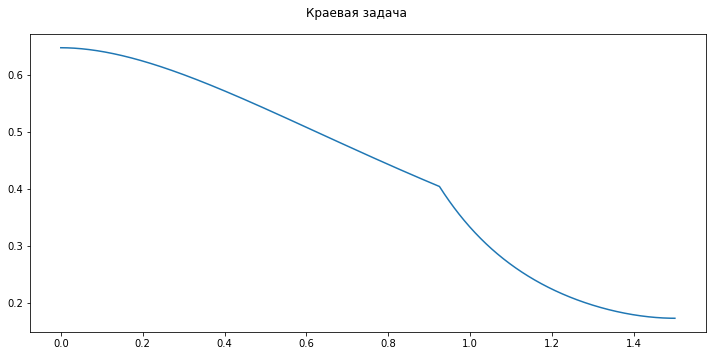

Error = 0.0001 < 0.001


In [47]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def f(x):
    return  7*np.exp(-x)

def k(x):
    return np.where(x <= c, 1.5, 0.4)

def q(x):
    return np.where(x <= c, 7.5, 12)

def tridiagonal_solver(l, m, u, r):
    n = m.size
    a = np.zeros(n)
    b = np.zeros(n)

    a[0] = -u[0] / m[0]
    b[0] = r[0] / m[0]

    for i in range(1, n-1):
       a[i]=-u[i] / (l[i] * a[i-1] + m[i])
       b[i]=(r[i] - l[i] * b[i-1]) / (l[i] * a[i-1] + m[i])

    X = np.zeros(n)
    b[n - 1]= (r[n - 1] - l[n - 1] * b[n - 2])/(m[n - 1] + l[n - 1] * a[n - 2])
    X[n - 1] = b[n - 1]

    for i in range(n - 2, -1, -1):
        X[i] = a[i]*X[i+1] + b[i]
    return X

    
n = 1000
a = 0
b = 1.5
c = 0.925
ua, ub = 0, 0
h = (b - a) / (n - 1)


l = np.zeros(n, dtype=np.float64)
m = np.zeros(n, dtype=np.float64)
u = np.zeros(n, dtype=np.float64)
r = np.zeros(n, dtype=np.float64)
x = np.linspace(a, b, n)
fig, ax = plt.subplots(figsize=(10, 5))

k_right = k((x[1: -1] + x[2:]) / 2)
k_left = k((x[1: -1] + x[0:-2]) / 2)
q_val = q(x[1: -1])
m[1:-1] = k_right + k_left + (h**2)*q_val
l[1:-1] = - k_left
u[1:-1] = - k_right
r[1:-1] = f(x[1:-1]) * (h ** 2)

k_start = k((x[1] + x[0]) / 2)
f_start = 2 * quad(f, x[0], x[1])[0] / h
q_start = 2 * quad(q, x[0], x[1])[0] / h
m[0] = k_start + (h ** 2) / 2 * q_start
u[0] = -k_start
r[0] = ua + f_start * (h ** 2) / 2

k_end = k((x[n - 1] + x[n - 2]) / 2)
f_end = 2 * quad(f, x[-2], x[-1])[0] / h
q_end = 2 * quad(q, x[-2], x[-1])[0] / h
m[-1] = k_end + (h ** 2) / 2 * q_end
l[-1] = - k_end
r[-1] = ub + f_end * (h ** 2) / 2

u_1 = tridiagonal_solver(l, m, u, r)
plt.plot(x, u_1)
plt.suptitle('Краевая задача')
plt.tight_layout()
plt.show()

n = 2*n - 1
h = (b - a) / (n - 1)
l = np.zeros(n, dtype=np.float64)
m = np.zeros(n, dtype=np.float64)
u = np.zeros(n, dtype=np.float64)
r = np.zeros(n, dtype=np.float64)
x = np.linspace(a, b, n)


k_right = k((x[1: -1] + x[2:]) / 2)
k_left = k((x[1: -1] + x[0:-2]) / 2)
q_val = q(x[1: -1])
m[1:-1] = k_right + k_left + (h ** 2) * q_val
l[1:-1] = - k_left
u[1:-1] = - k_right
r[1:-1] = f(x[1:-1]) * (h ** 2)

k_start = k((x[1] + x[0]) / 2)
f_start = 2 * quad(f, x[0], x[1])[0] / h
q_start = 2 * quad(q, x[0], x[1])[0] / h
m[0] = k_start + (h ** 2) / 2 * q_start
u[0] = -k_start
r[0] = ua + f_start * (h ** 2) / 2

k_end = k((x[n - 1] + x[n - 2]) / 2)
f_end = 2 * quad(f, x[n - 2], x[n - 1])[0] / h
q_end = 2 * quad(q, x[n - 2], x[n - 1])[0] / h
m[-1] = k_end + (h ** 2) / 2 * q_end
l[-1] = - k_end
r[-1] = ub + f_end * (h ** 2) / 2


u_2 = tridiagonal_solver(l, m, u, r)
errors = (u_2[::2] - u_1) / 3
max_error = np.abs(errors).max()
print(f'Error = {max_error:.4f} {"<" if max_error < 0.001 else ">"} 0.001')

### Задача 10.6.8

Промоделировать нестационарные процессы теплопроводности в
зависимости от входных данных задачи - коэффициента теплопроводности $k(x)$ и
начальной температуры $\phi(x)$

$$\frac{\partial u}{\partial t} =k(x)\frac{\partial^2 u}{\partial x^2} + \frac{\partial k(x)}{\partial x}\frac{\partial u}{\partial x}  + f(x)(1-e^{-t})$$

$$\frac{u^{n+1}_i - u^n_i}{\tau} = k(x)\frac{u^n_{i+1}-2u^n_{i}+u^n_{i-1}}{h^2} + k'(x)\frac{u^n_i-u^n_{i-1}}{h} + f(x_i)(1-e^{-t_n})$$

$$u^{n+1}_i = \frac{\tau k(x)}{h^2}u^n_{i+1} -(1 - \frac{2\tau k(x)}{h^2} + \frac{k'(x)\tau}{h})u^i_n + (\frac{\tau k(x)}{h^2} - \frac{k'(x)\tau}{h})u^{i-1}_n+\tau f(x_i)(1-e^{-t_n})

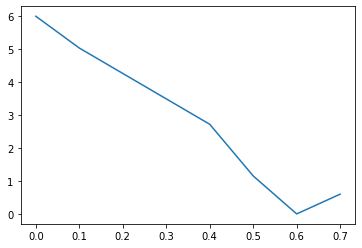

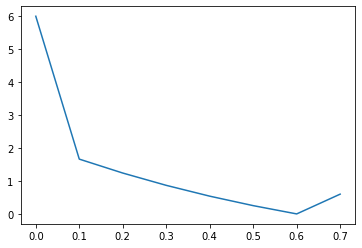

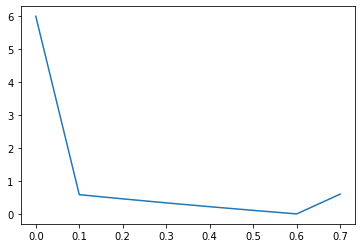

In [4]:
from matplotlib import animation
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def k(x):
    return x

def dk(x):
    return np.ones_like(x)

def f(x):
    return x + x**(1/3)

def phi(x):
    return (UB - UA) * x /(b-a) + UA

def c1(x):
    return tau * k(x)/h/h

def c2(x):
    return (1 - 2*tau*k(x)/h/h + dk(x)*tau/h)

def c3(x):
    return (tau*k(x)/h/h - dk(x)*tau/h)

a = 0.1
UA = 6
b = 0.8
UB = 0.6

tau = 0.0125
N = 1000
T0, T1 = 0, tau * N
h = 0.1
I = int((b-a)/h)

x = np.arange(a, b + h/2, h) - a
U = np.zeros((I + 1, N + 1))
U[0, :] = UA
U[-1, :] = UB
U[:, 0] = phi(x)
for n in range(0, N):
    tn = n * tau
    for i in range(1, I-1):
        xi = x[i]
        U[i, n+1] = c1(xi) * U[i + 1, n] + c2(xi) * U[i, n] + c3(xi) * U[i - 1, n]  + tau * f(xi)*(1-np.exp(-tn))
        

plt.plot(x, U[:, 2])
plt.show()
plt.plot(x, U[:, 40])
plt.show()
plt.plot(x, U[:, 80])
plt.show()



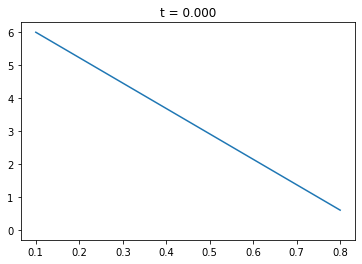

In [88]:
fig, ax = plt.subplots()
line, = ax.plot(x, U[:, -1])

def update(frame):
    frame*=100
    line.set_ydata(U[:, frame])
    ax.set_title(f"t = {frame * tau:.3f}")


ani = animation.FuncAnimation(fig=fig, func=update, frames=N//100, interval=100)
ani.save("phi.gif", writer="pillow")

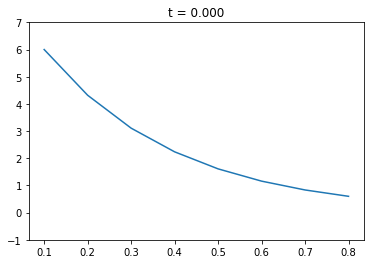

In [89]:
def phi(x):
    return 6*np.exp(-np.log(10)*10/7*(x - 0.1))
    
U[0, :] = UA
U[-1, :] = UB
U[:, 0] = phi(x)
for n in range(0, N):
    tn = n * tau
    for i in range(1, I-1):
        xi = x[i]
        U[i, n+1] = c1(xi) * U[i + 1, n] + c2(xi) * U[i, n] + c3(xi) * U[i - 1, n]  + tau * f(xi)*(1-np.exp(-tn))


fig, ax = plt.subplots()
ax.set_ylim(np.min(U) - 1, np.max(U) + 1)
line, = ax.plot(x, U[:, -1])



def update(frame):
    frame*=100
    line.set_ydata(U[:, frame])
    ax.set_title(f"t = {frame * tau:.3f}")


ani = animation.FuncAnimation(fig=fig, func=update, frames=N//100, interval=100)
ani.save("example.gif", writer="pillow")
